# 点扩散函数仿真
## CHIPY
本文档示例了使用hcipy进行仿真的过程

In [1]:
from CpicImgSim.psf_simulation import simulate_psf
from CpicImgSim import star_photlam
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def psf_imshow(psf):
    focal_img = psf.copy()
    focal_img = np.maximum(focal_img, 1e-5)
    focal_img = np.minimum(focal_img, focal_img.max()*0.01)
    image_log = np.log10(focal_img)
    plt.imshow(image_log, origin='lower', cmap='gray')

star = star_photlam(0, 'F0V', is_blackbody=True)

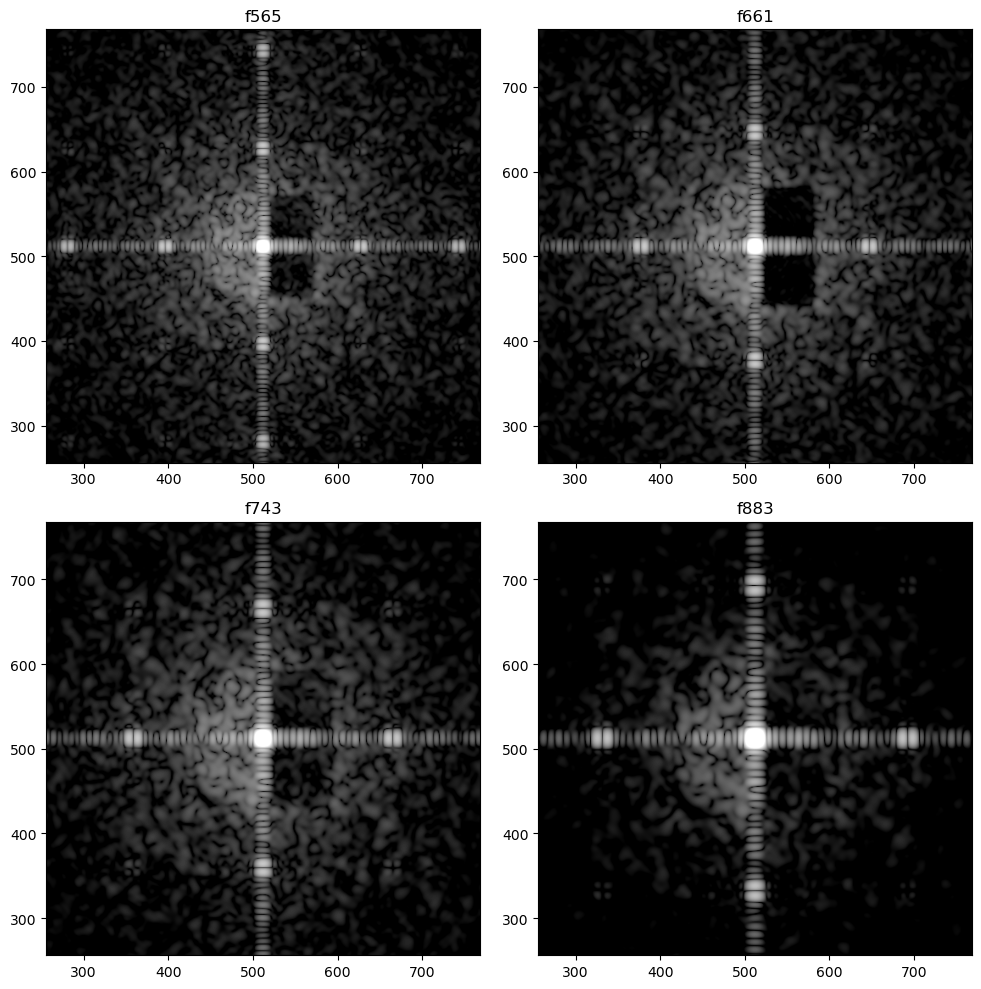

In [3]:
plt.figure(figsize=(10, 10))

psf_f565 = simulate_psf(0, 'f565', star, nsample=1)
plt.subplot(2, 2, 1)
psf_imshow(psf_f565)
plt.title('f565')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f661 = simulate_psf(0, 'f661', star, nsample=1)
plt.subplot(2, 2, 2)
psf_imshow(psf_f661)
plt.title('f661')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f743 = simulate_psf(0, 'f743', star, nsample=1)
plt.subplot(2, 2, 3)
psf_imshow(psf_f743)
plt.title('f743')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f883 = simulate_psf(0, 'f883', star, nsample=1)
plt.subplot(2, 2, 4)
psf_imshow(psf_f883)
plt.title('f883')
plt.xlim([256, 768])
plt.ylim([256, 768])
plt.tight_layout()

fits.writeto('image_files/template_psf.fits', psf_f661, overwrite=True)

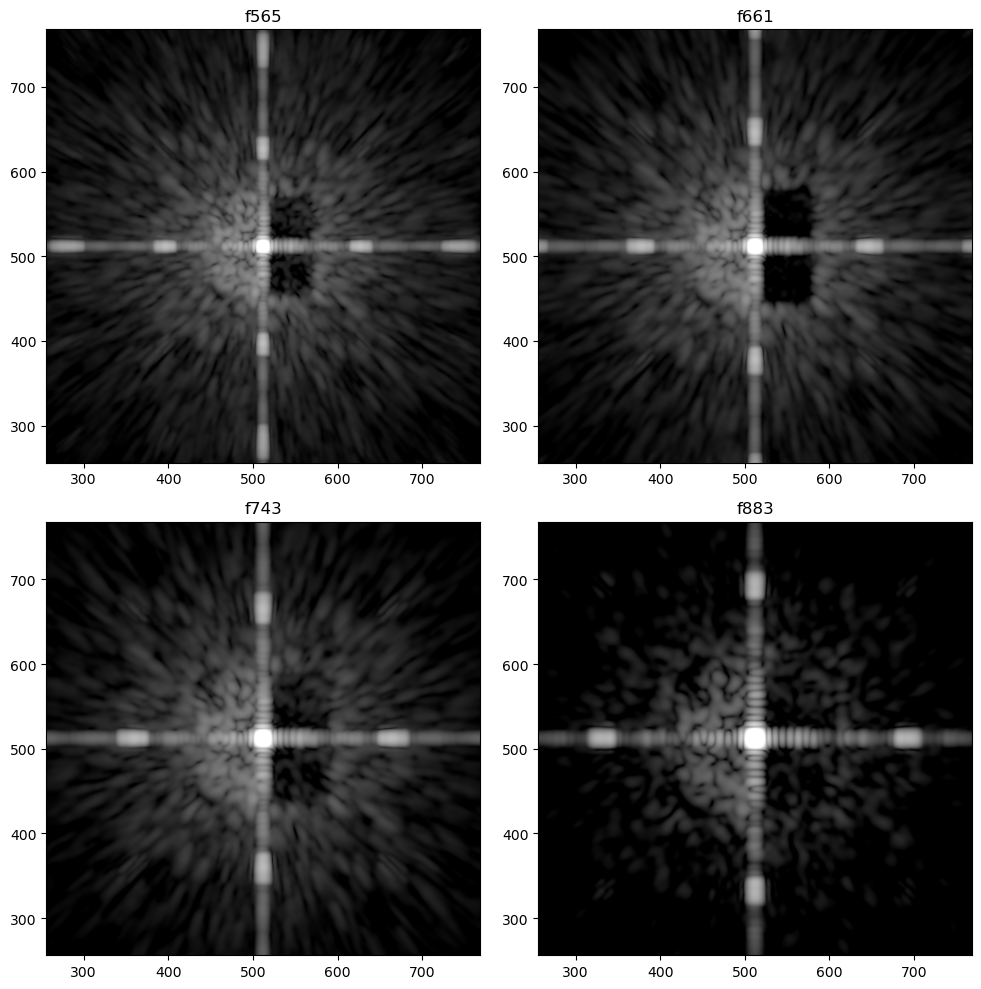

In [4]:
plt.figure(figsize=(10, 10))

psf_f565 = simulate_psf(0, 'f565', star, nsample=10)
plt.subplot(2, 2, 1)
psf_imshow(psf_f565)
plt.title('f565')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f661 = simulate_psf(0, 'f661', star, nsample=10)
plt.subplot(2, 2, 2)
psf_imshow(psf_f661)
plt.title('f661')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f743 = simulate_psf(0, 'f743', star, nsample=10)
plt.subplot(2, 2, 3)
psf_imshow(psf_f743)
plt.title('f743')
plt.xlim([256, 768])
plt.ylim([256, 768])

psf_f883 = simulate_psf(0, 'f883', star, nsample=10)
plt.subplot(2, 2, 4)
psf_imshow(psf_f883)
plt.title('f883')
plt.xlim([256, 768])
plt.ylim([256, 768])
plt.tight_layout()

Text(0, 0.5, 'normalized intensity')

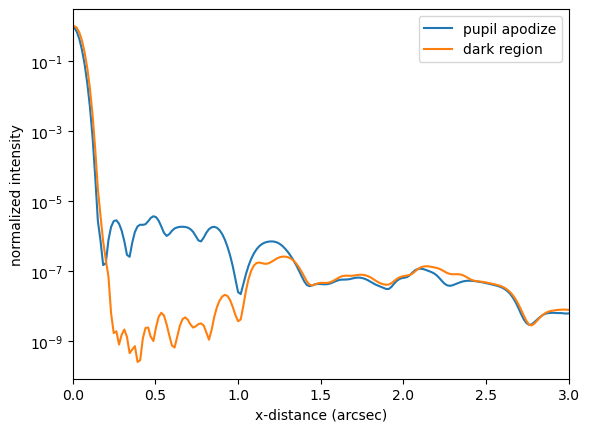

In [5]:

psf = psf_f661
x = np.arange(psf.shape[0])
x = x - x.max()/2
x = x * 0.016

plt.semilogy(-x, np.einsum('ii->i', psf)/psf.max(), label='pupil apodize')
plt.semilogy(x, np.einsum('ii->i', psf)/psf.max(), label='dark region')

# plt.semilogy(-x, np.einsum('ii->i', psf)/psf.max())
plt.xlim([0, 3])
plt.legend()
plt.xlabel('x-distance (arcsec)')
plt.ylabel('normalized intensity')